In [1]:
# Preprocessing on dataset
import cv2 as cv
import numpy as np
import os
import pandas as pd
from tqdm import tqdm

# Visualizations
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# Machine Learning 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split

# Metrics
from sklearn.metrics import accuracy_score
# Parameter tuning


In [2]:
test_image = cv.imread('Data/Nsukka-Gravel/Bigger-Size/Close-Range-25-30cm/20240204_101240.jpg')
#test_image = cv.imread('Data/Nsukka-Gravel/Smaller-Size/Close-Range-20-30cm/20240204_102340.jpg')
#test_image = cv.imread('Data/Red-Sand/Close-Range-20cm-30cm/IMG_6932.jpeg')
#test_image = cv.imread('Data/White-Sand/Close-Range-25-30cm/20240201_071815.jpg')

In [3]:
# Converting to RGB
test_image = cv.cvtColor(test_image, cv.COLOR_BGR2RGB)

# Converting to grayscale
test_image_gray = cv.cvtColor(test_image, cv.COLOR_RGB2GRAY)

error: OpenCV(4.8.1) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [ ]:
plt.imshow(test_image_gray, cmap='gray')

In [186]:
# Step 1. GrayImage
#cv.imwrite('Plans and Paper/Paper Images/Methodology/GrayScale.jpg', test_image_gray)

In [187]:
# Step 2. Resizing Image
gray_resized = cv.resize(test_image_gray, (500,500))

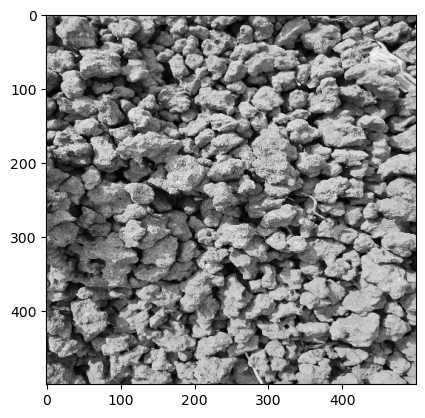

In [188]:
plt.imshow(gray_resized, cmap='gray')

In [93]:
#cv.imwrite('Plans and Paper/Paper Images/Methodology/Resize.jpg', gray_resized)

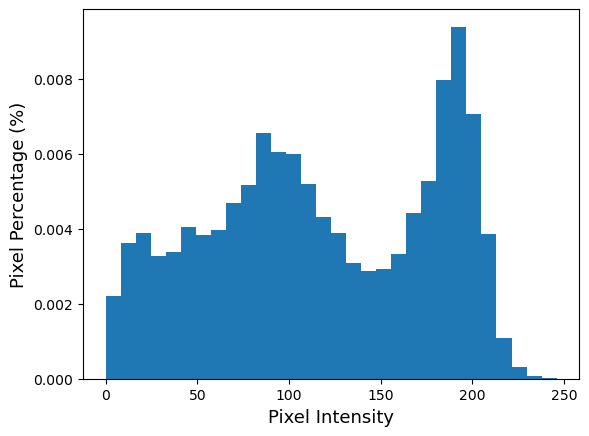

In [148]:
# Step 3 - Histogram Equalization
plt.hist(gray_resized.flatten(), bins=30, density=True)
plt.xlabel('Pixel Intensity', fontsize=13)
plt.ylabel('Pixel Percentage (%)', fontsize=13)
#plt.savefig('Pixel_distr_before_equal.jpg', dpi=800)

In [189]:
hist_equ = cv.equalizeHist(gray_resized)

Text(0, 0.5, 'Pixel Percentage (%)')

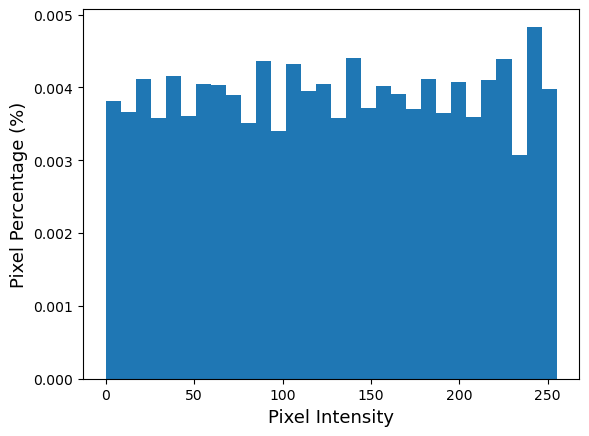

In [170]:
# Viewing the distribution again
plt.hist(hist_equ.flatten(), bins=30, density=True)
plt.xlabel('Pixel Intensity', fontsize=13)
plt.ylabel('Pixel Percentage (%)', fontsize=13)
#plt.savefig('Pixel_distr_after_equal.jpg', dpi=800)

Compared to the previous plot, the pixel values here are more distributed.

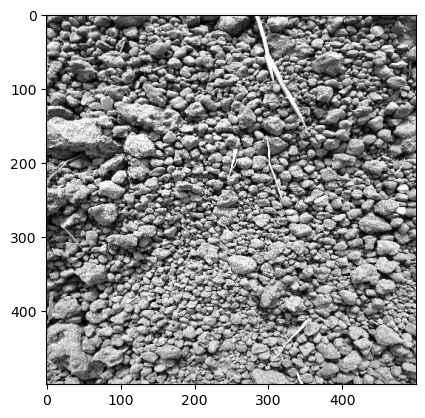

In [171]:
# Visualizing histogram equalized image
plt.imshow(hist_equ, cmap='gray')

In [98]:
#cv.imwrite('Plans and Paper/Paper Images/Methodology/histogram_equalized.jpg', hist_equ)

In [190]:
# Step 4. Blending
blended = 0.7*gray_resized + 0.3*hist_equ
blended = np.uint8(blended)
# Changing to Uint8


In [191]:
blended.max()

248

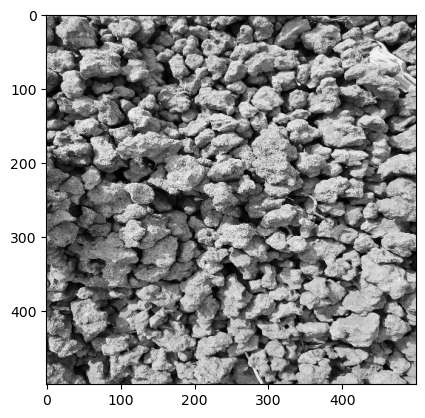

In [192]:
# Visualizing blended image
plt.imshow(blended, cmap='gray')

In [103]:
#cv.imwrite('Plans and Paper/Paper Images/Methodology/blended.jpg', blended)

In [193]:
# Appling Canny Edge Detection
canny_edge_img = cv.Canny(blended, 100, 350)

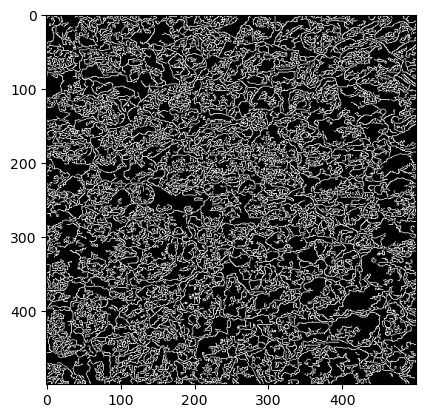

In [194]:
# Visualizing blended image
plt.imshow(canny_edge_img, cmap='gray')

In [133]:
def add_patch(x,y, dist_x, dist_y):
    plt.gca().add_patch(Rectangle((x,y),dist_x,dist_y,
                    edgecolor='red',
                    facecolor='none',
                    lw=3))

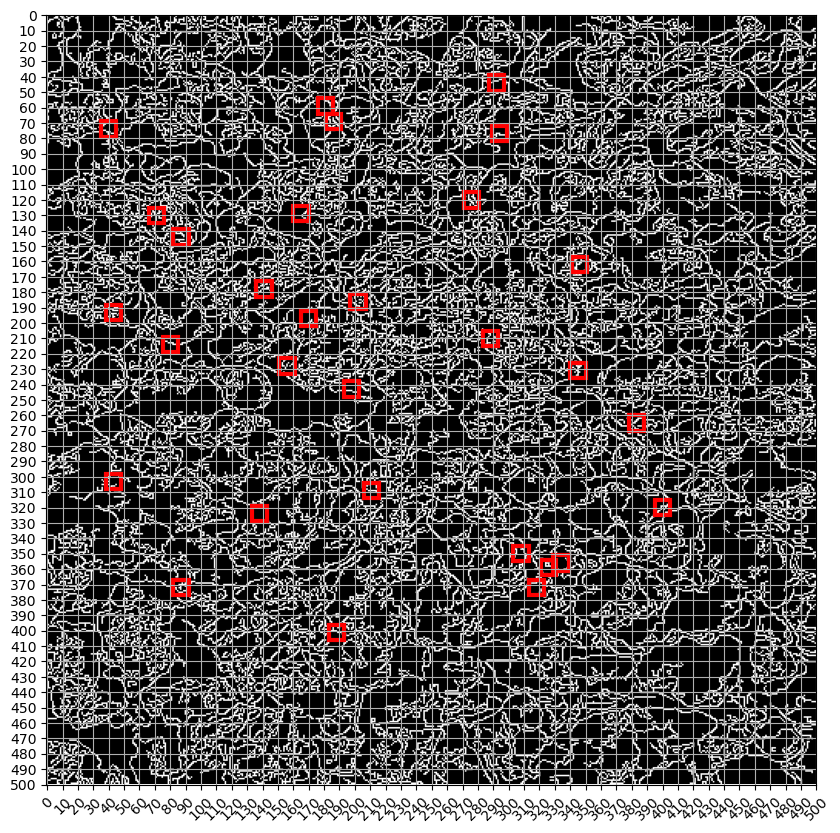

In [139]:
# Generating random positions
np.random.seed(30)
x=np.random.randint(20, 400, 30)
y=np.random.randint(20, 400, 30)

# Visualizing canny edge image
plt.figure(figsize=(12,10))
plt.imshow(canny_edge_img, cmap='gray')
for corr_x, corr_y in zip(x,y):
    add_patch(corr_x, corr_y, 10, 10)
plt.xticks(range(0,501,10), rotation=45)
plt.yticks(range(0,501,10))
plt.grid()
#plt.savefig('Naive_particle_size.jpg', dpi=800)

In [ ]:
#cv.imwrite('Plans and Paper/Paper Images/Methodology/canny_edge.jpg', canny_edge_img)

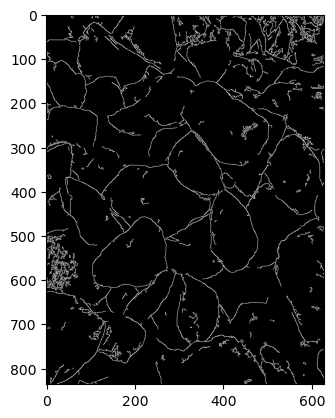

In [6]:
plt.imshow(canny_edge_img, cmap='gray')

In [ ]:
# Understanding Canny edge detection

In [ ]:
## Creating necessary functions
def get_to_canny()

# Training the model with ADABoost
1. Extract the percentiles into a table
2. 

One thing I've observed from numpy arrays is the dimensions are the latest i.e (3x10x2) means we have 3 dimensions of (10) rows by 2 columns

In [112]:
import numpy as np

# Example image (100x100)
image = np.random.randint(0, 10, size=(100, 100))  # Example 100x100 image with values between 0 and 9

patches = image.reshape(10, image.shape[0]//10, image.shape[1] // 10, 10)


In [113]:
image

array([[2, 6, 3, 2, 8, 6, 3, 8, 2, 9, 4, 9, 5, 0, 9, 1, 9, 7, 4, 6, 5, 6,
        2, 9, 6, 2, 4, 6, 1, 2, 5, 7, 9, 6, 6, 9, 7, 3, 9, 8, 6, 2, 6, 5,
        4, 0, 6, 4, 8, 6, 2, 6, 9, 9, 8, 2, 5, 7, 2, 9, 5, 5, 0, 8, 6, 8,
        1, 8, 0, 2, 9, 0, 9, 9, 3, 5, 3, 3, 4, 5, 0, 1, 0, 2, 5, 9, 0, 7,
        0, 6, 8, 3, 3, 8, 9, 7, 3, 5, 6, 9],
       [5, 6, 4, 9, 5, 4, 6, 1, 0, 1, 0, 8, 6, 7, 3, 6, 0, 1, 0, 7, 2, 1,
        2, 7, 0, 2, 6, 9, 9, 0, 5, 8, 4, 1, 8, 9, 3, 9, 1, 1, 4, 9, 9, 0,
        7, 7, 4, 6, 6, 0, 6, 4, 7, 8, 8, 3, 6, 7, 5, 3, 9, 7, 0, 6, 1, 4,
        1, 2, 7, 7, 9, 3, 0, 2, 7, 3, 6, 2, 9, 4, 1, 9, 8, 3, 7, 8, 7, 3,
        9, 4, 9, 6, 4, 2, 1, 6, 0, 2, 0, 3],
       [1, 4, 6, 8, 2, 2, 8, 2, 6, 8, 9, 0, 6, 3, 8, 6, 1, 6, 1, 2, 0, 7,
        2, 3, 1, 4, 6, 7, 4, 8, 2, 6, 5, 5, 3, 7, 3, 5, 9, 0, 7, 8, 5, 0,
        0, 6, 5, 3, 4, 9, 4, 6, 8, 4, 7, 6, 6, 7, 4, 0, 0, 0, 1, 6, 8, 9,
        7, 1, 4, 4, 0, 6, 5, 6, 3, 7, 3, 3, 1, 4, 6, 6, 8, 9, 1, 6, 5, 1,
        4, 2, 4, 7, 2,

In [107]:
patches.shape

(10, 10, 10, 10)

In [99]:
test=np.array([[[1,2], [3,4]], [[5,6], [7,8]]])

#[1,2][5,6]
#[3,4][7,8]

In [123]:
np.sum(test, axis=(2))

array([[ 3,  7],
       [11, 15]])

In [119]:
first_sum = np.sum(patches, axis=(1))
second_sum = np.sum(first_sum, axis=(2))

In [132]:
second_sum.ravel()

array([442, 444, 465, 480, 440, 467, 434, 418, 456, 471, 465, 412, 472,
       508, 501, 373, 437, 456, 473, 418, 486, 508, 454, 445, 451, 451,
       414, 468, 437, 430, 430, 405, 434, 428, 434, 463, 450, 438, 437,
       457, 471, 445, 408, 430, 449, 441, 440, 456, 483, 511, 535, 471,
       420, 457, 420, 503, 456, 448, 487, 454, 423, 473, 432, 511, 507,
       486, 472, 406, 431, 395, 440, 396, 443, 461, 485, 429, 444, 500,
       472, 401, 420, 493, 408, 463, 492, 481, 410, 491, 462, 444, 440,
       459, 433, 464, 439, 438, 471, 470, 435, 435])

In [16]:
patch_sum = np.sum(image, axis=(-2, -1))

In [84]:
import numpy as np

# Example image (2x100)
image = np.array([[5, 9, 6, 9, 6, 0, 9, 7, 5, 6, 1, 8, 6, 9, 8, 3, 9, 0, 9, 0, 6, 0, 7, 7, 5, 9, 1, 5, 2, 4, 9, 2, 5, 6, 3, 0, 6, 1, 8, 2, 7, 3, 6, 4, 7, 0, 7, 2, 5, 2, 8, 5, 2, 7, 3, 9, 1, 1, 3, 0, 1, 3, 0, 5, 5, 5, 9, 6, 2, 9, 9, 9, 9, 7, 4, 9, 4, 3, 7, 0, 4, 6, 0, 1, 6, 8, 4, 3, 2, 6, 7, 4, 2, 4, 0, 3, 3, 9, 9, 3],
                 [8, 0, 1, 0, 2, 5, 5, 9, 2, 9, 9, 6, 9, 8, 8, 6, 7, 3, 9, 3, 4, 3, 8, 3, 5, 8, 8, 0, 8, 3, 8, 2, 1, 8, 3, 0, 6, 9, 9, 7, 6, 4, 6, 3, 3, 8, 4, 1, 6, 8, 8, 1, 2, 0, 9, 2, 3, 6, 3, 8, 5, 4, 5, 9, 7, 0, 5, 0, 4, 3, 7, 6, 9, 0, 2, 4, 4, 8, 2, 0, 0, 5, 9, 8, 4, 4, 9, 7, 4, 0, 3, 1, 8, 2, 4, 9, 5, 2, 7, 1]])

# Reshape the image into non-overlapping 2x2 patches
patches = image.reshape(image.shape[0], image.shape[1] // 2, 2)

# Verify the shape of the resulting array (should be 2x50x2)
print(patches.shape)

(2, 50, 2)


In [195]:
def generate_perc_dist_columns(perc_distance=5):
    col_names=[]
    for dist in range(0,101,perc_distance):
        col_names.append('perc_'+str(dist)) 
    col_names.append('distance')
    return col_names

In [196]:
# Making the dataframe
names=generate_perc_dist_columns(perc_distance=1)
names.append('class')
#names_test=generate_perc_dist_columns()
#names_train.append('class')

working_df_train = pd.DataFrame(columns=names)
working_df_test = pd.DataFrame(columns=names)

In [197]:
working_df_test

Empty DataFrame
Columns: [perc_0, perc_1, perc_2, perc_3, perc_4, perc_5, perc_6, perc_7, perc_8, perc_9, perc_10, perc_11, perc_12, perc_13, perc_14, perc_15, perc_16, perc_17, perc_18, perc_19, perc_20, perc_21, perc_22, perc_23, perc_24, perc_25, perc_26, perc_27, perc_28, perc_29, perc_30, perc_31, perc_32, perc_33, perc_34, perc_35, perc_36, perc_37, perc_38, perc_39, perc_40, perc_41, perc_42, perc_43, perc_44, perc_45, perc_46, perc_47, perc_48, perc_49, perc_50, perc_51, perc_52, perc_53, perc_54, perc_55, perc_56, perc_57, perc_58, perc_59, perc_60, perc_61, perc_62, perc_63, perc_64, perc_65, perc_66, perc_67, perc_68, perc_69, perc_70, perc_71, perc_72, perc_73, perc_74, perc_75, perc_76, perc_77, perc_78, perc_79, perc_80, perc_81, perc_82, perc_83, perc_84, perc_85, perc_86, perc_87, perc_88, perc_89, perc_90, perc_91, perc_92, perc_93, perc_94, perc_95, perc_96, perc_97, perc_98, perc_99, ...]
Index: []

[0 rows x 103 columns]

In [199]:
def preprocess(image_path, canny_x=100, canny_y=350, blend_x=0.7, blend_y=0.3):
    image = cv.imread(image_path)
    # Converting to RGB
    image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

    # Converting to grayscale
    image_gray = cv.cvtColor(image, cv.COLOR_RGB2GRAY)
    
    # Resizing image
    gray_resized = cv.resize(image_gray, (500,500))
    
    # histogram equalization
    hist_equ = cv.equalizeHist(gray_resized)
    
    blended = blend_x*gray_resized + blend_y*hist_equ
    blended = np.uint8(blended)
    #plt.imshow(blended, cmap='gray')
    plt.show()
    
    # Appling Canny Edge Detection
    canny_edge_img = cv.Canny(blended, canny_x, canny_y)
    canny_edge_img_unit = canny_edge_img/255
    
    return canny_edge_img_unit    

In [200]:
def get_pixel_sum(full_image, no_of_patches=25): 
    patches = full_image.reshape(25, 10, 10, 10, 10)
    values=[]

    for img_patch_no in range(no_of_patches):
        image_patch = patches[img_patch_no]
        first_sum = np.sum(image_patch, axis=(1))
        second_sum = np.sum(first_sum, axis=(2))
        values.append(second_sum.flatten())

    final = np.array(values).ravel()
    return final

In [201]:
def get_percentiles_distance(naive_particle_sizes, perc_distance=5, image_distance='short'):
    percentiles = []
    for a in range(0,101,perc_distance):
        percentiles.append(np.percentile(naive_particle_sizes, a))

    # Define range and standard deviation
    range_min = 20  # Minimum value in the range
    range_max = 30  # Maximum value in the range
    std_dev = 2  # Standard deviation

    # Generate a random number with specified range and standard deviation
    random_number = np.random.normal(loc=(range_max + range_min) / 2, scale=std_dev)

    # Ensure the generated number falls within the specified range
    random_number = np.clip(random_number, range_min, range_max)
    percentiles.append(random_number)
    
    return percentiles

    #df.loc[len(df)] = percentiles
    #df = df.append(pd.Series(new_record, index=df.columns), ignore_index=True)

In [202]:
# Importing images
soil_0_path='data/Nsukka-Gravel/Smaller-Size/Close-Range-20-30cm/'
soil_1_path='data/Nsukka-Gravel/Bigger-Size/Close-Range-25-30cm/'
soil_2_path='Data/Red-Sand/Close-Range-20cm-30cm/'
soil_3_path='Data/White-Sand/Close-Range-25-30cm/'

soil_0=sorted(os.listdir(soil_0_path))
soil_1=sorted(os.listdir(soil_1_path))
soil_2=sorted(os.listdir(soil_2_path))
soil_3=sorted(os.listdir(soil_3_path))

In [203]:
all_soils=[soil_0, soil_1, soil_2, soil_3]
all_soil_path=[soil_0_path, soil_1_path, soil_2_path, soil_3_path]

In [205]:
# We're using 25% of all soils for testing and 75% for training
# Next step is to populate the data frame
np.random.seed(42)

for soil, soil_path, class_ in zip(all_soils, all_soil_path, [0,1,2,2]):
    train=soil[0:int(len(soil)*0.75)]
    test=soil[int(len(soil)*0.75):]
    print(f"For current soil in class {class_}, we have {len(train)} training data and {len(test)} testing data!")
    
    print ('Working on Training Set')
    for soil_pic in tqdm(train):
        naive_particle_pic=preprocess(soil_path+soil_pic)
        #print(naive_particle_pic, soil_path+soil_pic)
        naive_particle_sum=get_pixel_sum(naive_particle_pic)
        #print(type(naive_particle_sum))
        percentiles=get_percentiles_distance(naive_particle_sum, perc_distance=1)
        #print(percentiles)
        percentiles.append(class_)
        working_df_train.loc[len(working_df_train)] = percentiles
    
    print('\n','======Finished Training set=======', '\n')
    print ('Working on Testing Set')
    for soil_pic_test in tqdm(test):
        naive_particle_pic_test=preprocess(soil_path+soil_pic_test)
        naive_particle_sum_test=get_pixel_sum(naive_particle_pic_test)
        percentiles_test=get_percentiles_distance(naive_particle_sum_test, perc_distance=1)
        percentiles_test.append(class_)
        working_df_test.loc[len(working_df_test)] = percentiles_test
    print('\n')
    

For current soil in class 0, we have 147 training data and 49 testing data!
Working on Training Set


100%|████████████████████████████████████████████████████████████████████████████████| 147/147 [01:40<00:00,  1.46it/s]



 ======Finished Training set======= 

Working on Testing Set


100%|██████████████████████████████████████████████████████████████████████████████████| 49/49 [00:32<00:00,  1.52it/s]




For current soil in class 1, we have 196 training data and 66 testing data!
Working on Training Set


100%|████████████████████████████████████████████████████████████████████████████████| 196/196 [02:14<00:00,  1.46it/s]



 ======Finished Training set======= 

Working on Testing Set


100%|██████████████████████████████████████████████████████████████████████████████████| 66/66 [00:41<00:00,  1.59it/s]




For current soil in class 2, we have 106 training data and 36 testing data!
Working on Training Set


100%|████████████████████████████████████████████████████████████████████████████████| 106/106 [01:03<00:00,  1.68it/s]



 ======Finished Training set======= 

Working on Testing Set


100%|██████████████████████████████████████████████████████████████████████████████████| 36/36 [00:19<00:00,  1.87it/s]




For current soil in class 2, we have 501 training data and 168 testing data!
Working on Training Set


100%|████████████████████████████████████████████████████████████████████████████████| 501/501 [05:02<00:00,  1.66it/s]



 ======Finished Training set======= 

Working on Testing Set


100%|████████████████████████████████████████████████████████████████████████████████| 168/168 [01:41<00:00,  1.66it/s]

In [206]:
X=working_df_train.drop('class', axis=1)
y=working_df_train['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

In [219]:
dec_tree = DecisionTreeClassifier()

In [220]:
dec_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [221]:
pred=dec_tree.predict(X_test)

In [222]:
dec_tree.feature_importances_

array([0.24231692, 0.06468175, 0.03294029, 0.        , 0.01355847,
       0.00872108, 0.        , 0.00763637, 0.01154133, 0.01016933,
       0.        , 0.00366215, 0.00286364, 0.        , 0.        ,
       0.00245455, 0.01325229, 0.        , 0.        , 0.        ,
       0.00572728, 0.        , 0.        , 0.        , 0.0043081 ,
       0.        , 0.00477273, 0.00572728, 0.00190909, 0.        ,
       0.00658182, 0.        , 0.00381819, 0.        , 0.        ,
       0.00504955, 0.        , 0.        , 0.00668182, 0.00899317,
       0.        , 0.00632864, 0.00381819, 0.        , 0.        ,
       0.0089091 , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.10411155, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.00740381, 0.        ,
       0.01527274, 0.        , 0.00961545, 0.01171593, 0.00689556,
       0.        , 0.        , 0.01271592, 0.        , 0.     

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101],
 [Text(0, 0, 'perc_0'),
  Text(1, 0, 'perc_1'),
  Text(2, 0, 'perc_2'),
  Text(3, 0, 'perc_3'),
  Text(4, 0, 'perc_4'),
  Text(5, 0, 'perc_5'),
  Text(6, 0, 'perc_6'),
  Text(7, 0, 'perc_7'),
  Text(8, 0, 'perc_8'),
  Text(9, 0, 'perc_9'),
  Text(10, 0, 'perc_10'),
  Text(11, 0, 'perc_11'),
  Text(12, 0, 'perc_12'),
  Text(13, 0, 'perc_13'),
  Text(14, 0, 'perc_14'),
  Text(15, 0, 'perc_15'),

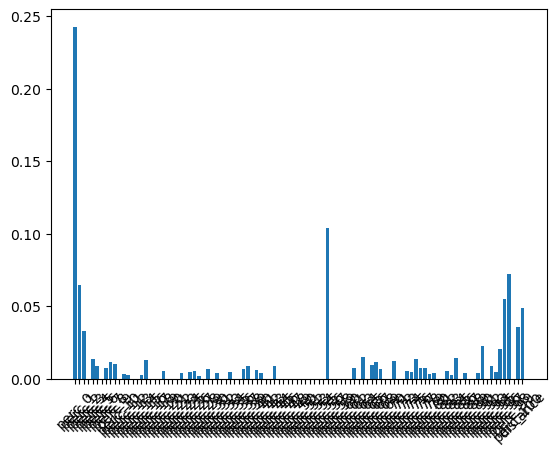

In [223]:
plt.bar(X.columns,dec_tree.feature_importances_)
plt.xticks(rotation=45)

In [224]:
accuracy_score(y_test, pred)

0.7368421052631579

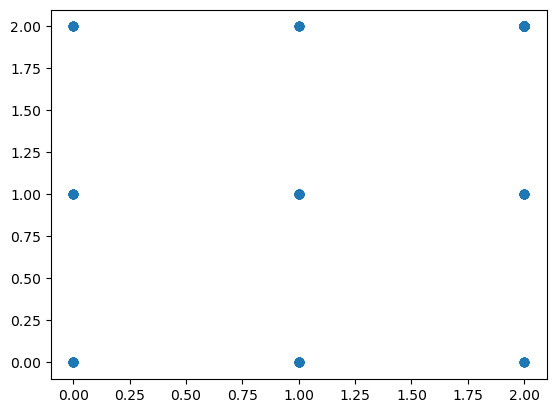

In [225]:
plt.scatter(y_test, pred)

In [83]:
working_df_test

perc_0  perc_5  perc_10  perc_15  perc_20  perc_25  perc_30  perc_35  \
0      10.0    20.0     22.0     24.0     25.0     26.0     27.0     28.0   
1      11.0    20.0     22.0     24.0     25.0     26.0     27.0     28.0   
2       7.0    18.0     21.0     22.0     23.0     24.0     25.0     26.0   
3       6.0    17.0     20.0     21.0     22.0     24.0     25.0     26.0   
4       7.0    15.0     18.0     19.0     20.0     21.0     22.0     23.0   
..      ...     ...      ...      ...      ...      ...      ...      ...   
314     0.0     1.0      4.0      5.0      7.0      8.0      9.0     10.0   
315     1.0    16.0     20.0     22.0     23.0     24.0     25.0     26.0   
316     0.0     3.0      5.0      7.0      8.0     10.0     11.0     13.0   
317     0.0    13.0     16.0     19.0     21.0     22.0     24.0     25.0   
318     0.0     0.0      0.0      0.0      1.0      2.0      3.0      5.0   

     perc_40  perc_45  ...  perc_65  perc_70  perc_75  perc_80  perc_85  \
0       29.0     29.0  ...     32.0     33.3     34.0     35.0     37.0   
1       29.0     29.0  ...     32.0     33.0     34.0     35.0     36.0   
2       27.0     27.0  ...     31.0     31.0     32.0     33.0     34.0   
3       26.0     27.0  ...     31.0     32.0     33.0     34.0     35.0   
4       24.0     25.0  ...     28.0     29.0     30.0     31.0     32.0   
..       ...      ...  ...      ...      ...      ...      ...      ...   
314     11.0     12.0  ...     16.0     17.0     18.0     20.0     21.0   
315     27.0     28.0  ...     32.0     33.0     34.0     35.0     36.0   
316     14.0     15.0  ...     20.0     21.0     23.0     24.0     26.0   
317     26.0     27.0  ...     31.0     32.0     33.0     34.0     36.0   
318      6.0      7.0  ...     10.0     11.0     13.0     14.0     15.0   

     perc_90  perc_95  perc_100   distance  class  
0       38.0     40.0      50.0  22.359087    0.0  
1       38.0     40.0      49.0  26.043883    0.0  
2       36.0     38.0      49.0  25.593969    0.0  
3       36.0     38.0      47.0  25.500986    0.0  
4       34.0     36.0      46.0  25.692896    0.0  
..       ...      ...       ...        ...    ...  
314     23.0     27.0      42.0  25.338722    2.0  
315     38.0     40.0      49.0  22.172571    2.0  
316     28.0     32.0      47.0  24.777548    2.0  
317     37.0     39.0      50.0  23.192185    2.0  
318     17.0     21.0      35.0  23.528940    2.0  

[319 rows x 23 columns]

In [ ]:
# Quick Modelling

In [13]:
import numpy as np

# Example image (100x100)
image = np.random.randint(0, 10, size=(500, 500))  # Example 100x100 image with values between 0 and 9

patches = image.reshape(25, 10, 10, 10, 10)

values=[]

for img_patch_no in range(25):
    image_patch = patches[img_patch_no]
    values.append(get_pixel_sum(image_patch))
    
final = np.array(values).ravel()
    


In [147]:
values

[array([473, 434, 474, 504, 422, 455, 451, 458, 534, 394, 382, 442, 506,
        457, 451, 425, 442, 457, 457, 466, 424, 430, 442, 406, 466, 434,
        470, 456, 439, 441, 399, 507, 408, 421, 458, 414, 508, 486, 447,
        527, 464, 436, 441, 438, 457, 466, 457, 424, 438, 461, 457, 401,
        430, 404, 450, 505, 465, 484, 443, 449, 457, 423, 459, 457, 417,
        461, 418, 471, 501, 465, 424, 431, 486, 461, 475, 443, 475, 366,
        485, 427, 478, 446, 449, 434, 427, 441, 471, 459, 409, 496, 435,
        515, 448, 443, 453, 452, 448, 451, 475, 451]),
 array([428, 457, 458, 443, 437, 412, 472, 455, 478, 437, 454, 499, 403,
        458, 509, 410, 480, 469, 435, 407, 525, 477, 457, 424, 482, 470,
        491, 449, 474, 462, 452, 435, 446, 444, 449, 441, 440, 512, 392,
        482, 420, 465, 433, 423, 516, 382, 441, 407, 428, 399, 500, 466,
        425, 480, 439, 519, 448, 476, 431, 440, 480, 484, 454, 469, 506,
        495, 410, 453, 425, 429, 439, 414, 444, 371, 441, 473, 454, 4

In [127]:
image

array([[3, 4, 8, 2, 1, 1, 5, 1, 4, 4, 2, 1, 2, 2, 9, 6, 9, 3, 3, 0, 2, 9,
        4, 1, 7, 4, 0, 9, 4, 5, 9, 1, 5, 0, 0, 4, 4, 4, 7, 7, 3, 2, 4, 6,
        9, 3, 3, 4, 6, 3, 5, 2, 4, 3, 0, 3, 1, 0, 9, 0, 1, 9, 3, 6, 7, 9,
        4, 3, 3, 3, 7, 6, 4, 3, 8, 8, 8, 6, 7, 7, 2, 3, 0, 5, 8, 6, 2, 4,
        1, 1, 9, 3, 3, 5, 9, 2, 8, 7, 5, 8, 9, 5, 8, 0, 9, 4, 7, 9, 2, 8,
        9, 1, 4, 1, 5, 3, 9, 8, 9, 6, 2, 6, 9, 8, 3, 6, 5, 8, 3, 6, 1, 6,
        5, 5, 6, 6, 7, 3, 4, 5, 3, 6, 7, 0, 4, 8, 3, 7, 3, 8, 7, 2, 4, 8,
        4, 8, 0, 2, 2, 1, 0, 1, 5, 1, 9, 0, 2, 0, 0, 3, 2, 8, 6, 4, 5, 9,
        5, 1, 4, 2, 5, 9, 8, 5, 2, 3, 7, 5, 6, 9, 3, 9, 2, 1, 7, 5, 7, 5,
        1, 3, 3, 9, 4, 4, 9, 0, 0, 1, 9, 0, 9, 3, 7, 1, 5, 1, 6, 7, 7, 3,
        3, 5, 1, 8, 6, 3, 8, 4, 5, 7, 7, 0, 0, 1, 3, 6, 0, 1, 1, 1, 8, 4,
        9, 5, 2, 7, 9, 4, 6, 4, 6, 9, 1, 4, 6, 0, 8, 0, 1, 0, 5, 2, 3, 2,
        9, 1, 5, 4, 4, 5, 7, 1, 9, 1, 6, 8, 3, 9, 9, 6, 8, 9, 5, 7, 1, 0,
        0, 8, 0, 4, 6, 1, 7, 3, 9, 3, 

In [128]:
patches

array([[[[[3, 4, 8, 2, 1, 1, 5, 1, 4, 4],
          [2, 1, 2, 2, 9, 6, 9, 3, 3, 0],
          [2, 9, 4, 1, 7, 4, 0, 9, 4, 5],
          [9, 1, 5, 0, 0, 4, 4, 4, 7, 7],
          [3, 2, 4, 6, 9, 3, 3, 4, 6, 3],
          [5, 2, 4, 3, 0, 3, 1, 0, 9, 0],
          [1, 9, 3, 6, 7, 9, 4, 3, 3, 3],
          [7, 6, 4, 3, 8, 8, 8, 6, 7, 7],
          [2, 3, 0, 5, 8, 6, 2, 4, 1, 1],
          [9, 3, 3, 5, 9, 2, 8, 7, 5, 8]],

         [[9, 5, 8, 0, 9, 4, 7, 9, 2, 8],
          [9, 1, 4, 1, 5, 3, 9, 8, 9, 6],
          [2, 6, 9, 8, 3, 6, 5, 8, 3, 6],
          [1, 6, 5, 5, 6, 6, 7, 3, 4, 5],
          [3, 6, 7, 0, 4, 8, 3, 7, 3, 8],
          [7, 2, 4, 8, 4, 8, 0, 2, 2, 1],
          [0, 1, 5, 1, 9, 0, 2, 0, 0, 3],
          [2, 8, 6, 4, 5, 9, 5, 1, 4, 2],
          [5, 9, 8, 5, 2, 3, 7, 5, 6, 9],
          [3, 9, 2, 1, 7, 5, 7, 5, 1, 3]],

         [[3, 9, 4, 4, 9, 0, 0, 1, 9, 0],
          [9, 3, 7, 1, 5, 1, 6, 7, 7, 3],
          [3, 5, 1, 8, 6, 3, 8, 4, 5, 7],
          [7, 0, 0, 1, 3, 6, 0

# Using the Neural Network

In [ ]:
# Training the Neural Net

url = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'
feature_extract = hub.KerasLayer(url, input_shape = (image_size, image_size, 3))
feature_extract.trainable = False

model = tf.keras.Sequential([
    feature_extract,
    tf.keras.layers.Dense(3, activation = 'softmax')
])

model.summary()

In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

In [ ]:
# Early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 15)

#saving best model
save_best = tf.keras.callbacks.ModelCheckpoint("./best_model.h5", monitor = 'val_loss',
                                              save_best_only = True)

In [ ]:
# fiting the model
epochs = 20
history = model.fit(tr_batches,
                       epochs = epochs,
                       validation_data = val_batches,
                       callbacks = [early_stopping, save_best])